## Introduction

A [**Sankey diagram**](https://www.data-to-viz.com/graph/sankey.html) is a visualisation technique that allows to display flows. Several entities (nodes) are represented by rectangles or text. Their links are represented with arrow or arcs that have a width proportional to the importance of the flow.

The [pySankey](https://github.com/anazalea/pySankey) library, which is based on Matplotlib, makes it extremely easy to obtain Sankey diagrams in Python. This post is based on the library's documentation and aims to explain how to obtain Sankey diagrams with the pySankey library.

The `pySankey` library can be installed with `pip install pysankey`, but note you need to use `pySankey` instead of `pysankey` when importing the library or something from it.

In [1]:
import pandas as pd

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

## Basic Sankey diagram

Let's import the `fruits.txt` dataset that comes with the library. Here we download it from the [github repository](https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/fruits.txt).

The dataset has 2 columns only. Each row describes a connection, with the origin in the first column and the destination in the second. If a connection has several occurences in the dataset (the same row appears many times), its weight will be higher and the connection on the diagram will be bigger.

The `sankey()` function is used to draw the diagram. It takes at least 2 arguments as input: the origin and destination columns:

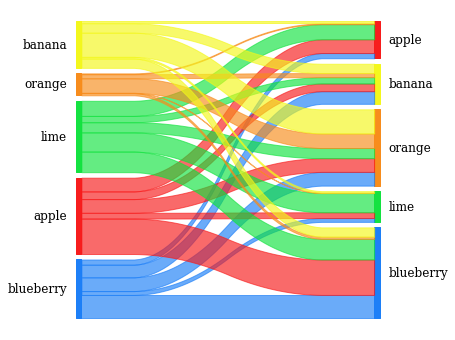

In [2]:
url = "https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/fruits.txt"
df = pd.read_csv(url, sep=" ", names=["true", "predicted"])

colors = {
    "apple": "#f71b1b",
    "blueberry": "#1b7ef7",
    "banana": "#f3f71b",
    "lime": "#12e23f",
    "orange": "#f78c1b"
}

sankey(df["true"], df["predicted"], aspect=20, colorDict=colors, fontsize=12)

## Dataset with weights

It's also possible to use weights. The following diagram is based on the [customer-goods.csv](https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/customers-goods.csv) data from the pySankey library. This time each connection has only 1 row in the dataset, but its weight is explicitely provided in a column called `revenue`. We can provide this column to the `leftWeight` and `rightWeight` argument to draw the connections with the according sizes.

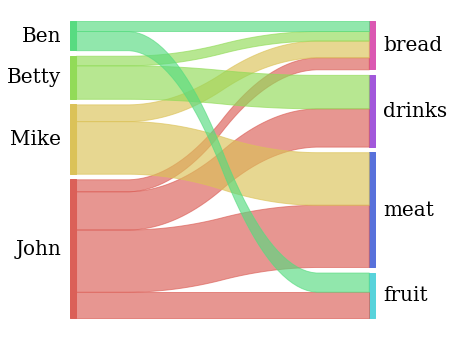

In [3]:
url = "https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/customers-goods.csv"
df = pd.read_csv(url, sep=",")

sankey(
    left=df["customer"], right=df["good"], 
    leftWeight= df["revenue"], rightWeight=df["revenue"], 
    aspect=20, fontsize=20
)

## Save the figure (`.png`)

You need [matplotlib](https://python-graph-gallery.com/matplotlib/) if you want to save the diagram with a custom size:

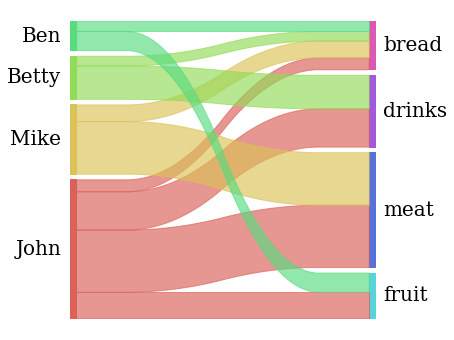

In [4]:
import matplotlib.pyplot as plt

# Create Sankey diagram again
sankey(
    left=df["customer"], right=df["good"], 
    leftWeight= df["revenue"], rightWeight=df["revenue"], 
    aspect=20, fontsize=20
)

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(6, 6)

# Set the color of the background to white
fig.set_facecolor("w")

# Save the figure
fig.savefig("customers-goods.png", bbox_inches="tight", dpi=150)